In [1]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

In [2]:
text = '''Fog everywhere. Fog up the river, where it flows among green aits and meadows; fog down the river, where it rolls deified among the tiers of shipping and the waterside pollutions of a great (and dirty) city. Fog on the Essex marshes, fog on the Kentish heights. Fog creeping into the cabooses of collier-brigs; fog lying out on the yards and hovering in the rigging of great ships; fog drooping on the gunwales of barges and small boats. Fog in the eyes and throats of ancient Greenwich pensioners, wheezing by the firesides of their wards; fog in the stem and bowl of the afternoon pipe of the wrathful skipper, down in his close cabin; fog cruelly pinching the toes and fingers of his shivering little apprentice boy on deck. Chance people on the bridges peeping over the parapets into a nether sky of fog, with fog all round them, as if they were up in a balloon and hanging in the misty clouds.'''

#### Sentences

In [3]:
sentences = sent_tokenize(text)

In [4]:
len(sentences)

6

In [5]:
for sentence in sentences:
    print(f"{sentence}...")

Fog everywhere....
Fog up the river, where it flows among green aits and meadows; fog down the river, where it rolls deified among the tiers of shipping and the waterside pollutions of a great (and dirty) city....
Fog on the Essex marshes, fog on the Kentish heights....
Fog creeping into the cabooses of collier-brigs; fog lying out on the yards and hovering in the rigging of great ships; fog drooping on the gunwales of barges and small boats....
Fog in the eyes and throats of ancient Greenwich pensioners, wheezing by the firesides of their wards; fog in the stem and bowl of the afternoon pipe of the wrathful skipper, down in his close cabin; fog cruelly pinching the toes and fingers of his shivering little apprentice boy on deck....
Chance people on the bridges peeping over the parapets into a nether sky of fog, with fog all round them, as if they were up in a balloon and hanging in the misty clouds....


#### Tokens

In [6]:
words = word_tokenize(text)

In [7]:
for word in words[:5]:
    print(word)

Fog
everywhere
.
Fog
up


#### Stopwords

In [8]:
from nltk.corpus import stopwords

In [9]:
stop_words = set(stopwords.words("english"))
len(stop_words)

179

In [10]:
[word for word in words[:20] if not word.casefold() in stop_words]

['Fog',
 'everywhere',
 '.',
 'Fog',
 'river',
 ',',
 'flows',
 'among',
 'green',
 'aits',
 'meadows',
 ';',
 'fog']

#### Stemming

In [11]:
from nltk import PorterStemmer, SnowballStemmer, LancasterStemmer

In [12]:
ps = PorterStemmer()
ss = SnowballStemmer("english")
ls = LancasterStemmer()

In [13]:
list_words = ["give", "given", "giving", "gave"]

In [14]:
def stemming(list_words):
    print("Stemmer: Porter Stemmer")
    for word in list_words:
        print(word + ":" + ps.stem(word))
        
    print("Stemmer: Snowball Stemmer")
    for word in list_words:
        print(word + ":" + ss.stem(word))
        
    print("Stemmer: Lancaster Stemmer")
    for word in list_words:
        print(word + ":" + ls.stem(word))

In [15]:
stemming(list_words)

Stemmer: Porter Stemmer
give:give
given:given
giving:give
gave:gave
Stemmer: Snowball Stemmer
give:give
given:given
giving:give
gave:gave
Stemmer: Lancaster Stemmer
give:giv
given:giv
giving:giv
gave:gav


#### Lemmatization

In [16]:
from nltk.stem import WordNetLemmatizer

In [17]:
wnl = WordNetLemmatizer()

In [18]:
#Without mentioning pos
for word in list_words:
    print(word + ":" + wnl.lemmatize(word))

give:give
given:given
giving:giving
gave:gave


In [19]:
#With POS as verb
for word in list_words:
    print(word + ":" + wnl.lemmatize(word, pos="v"))

give:give
given:give
giving:give
gave:give


#### Part Of Speech

In [21]:
pos = nltk.pos_tag(words[:10])
pos

[('Fog', 'NNP'),
 ('everywhere', 'RB'),
 ('.', '.'),
 ('Fog', 'NNP'),
 ('up', 'IN'),
 ('the', 'DT'),
 ('river', 'NN'),
 (',', ','),
 ('where', 'WRB'),
 ('it', 'PRP')]

In [22]:
# nltk.help.upenn_tagset()

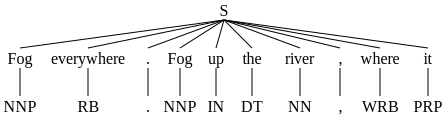

In [23]:
nltk.chunk.ne_chunk(pos)

#### Named Entity Recognition

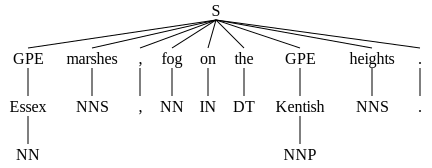

In [24]:
nltk.ne_chunk(nltk.pos_tag(words[47:56]))

#### Frequency Distribution

In [25]:
from nltk.probability import FreqDist

In [26]:
freqdist = FreqDist(words)


In [27]:
freqdist

FreqDist({'the': 19, 'of': 11, 'and': 9, 'fog': 8, ',': 7, '.': 6, 'on': 6, 'in': 6, 'Fog': 5, ';': 5, ...})

In [28]:
freqdist.most_common(5)

[('the', 19), ('of', 11), ('and', 9), ('fog', 8), (',', 7)]

<Axes: xlabel='Samples', ylabel='Cumulative Counts'>

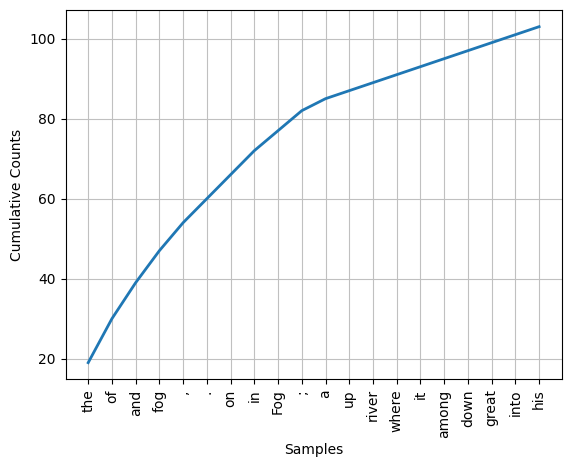

In [29]:
freqdist.plot(20, cumulative=True)

#### Collocation

In [30]:
from nltk.util import bigrams, trigrams, ngrams

In [31]:
list(bigrams(words))[:5]

[('Fog', 'everywhere'),
 ('everywhere', '.'),
 ('.', 'Fog'),
 ('Fog', 'up'),
 ('up', 'the')]

In [32]:
list(trigrams(words))[:5]

[('Fog', 'everywhere', '.'),
 ('everywhere', '.', 'Fog'),
 ('.', 'Fog', 'up'),
 ('Fog', 'up', 'the'),
 ('up', 'the', 'river')]

In [33]:
list(ngrams(words,4))[:5]

[('Fog', 'everywhere', '.', 'Fog'),
 ('everywhere', '.', 'Fog', 'up'),
 ('.', 'Fog', 'up', 'the'),
 ('Fog', 'up', 'the', 'river'),
 ('up', 'the', 'river', ',')]